Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   

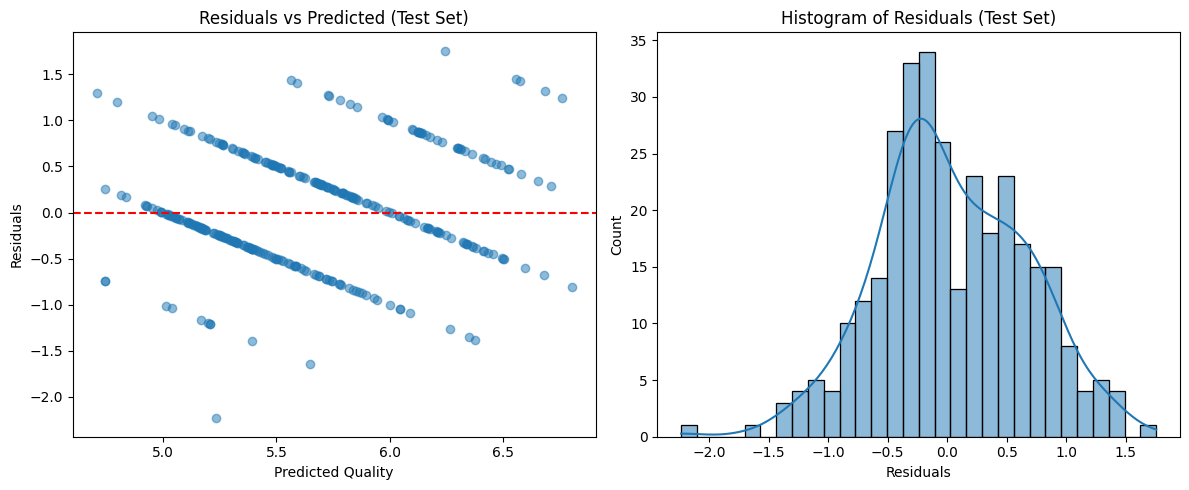


Model Performance Metrics:
Training MSE: 0.4242
Test MSE: 0.3900
Training RMSE: 0.6513
Test RMSE: 0.6245
Training R²: 0.3480
Test R²: 0.4032


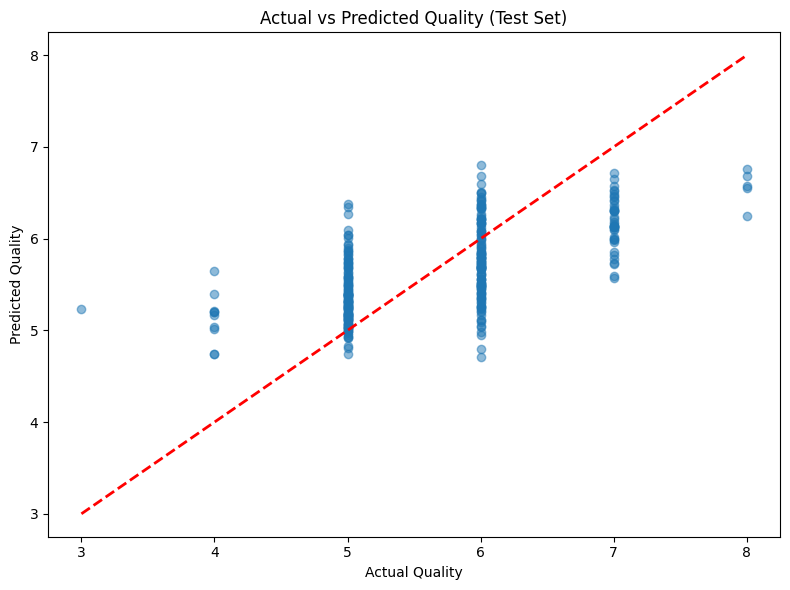


Feature Coefficients:
fixed acidity: 0.0398
volatile acidity: -0.1794
citric acid: -0.0275
residual sugar: 0.0094
chlorides: -0.0891
free sulfur dioxide: 0.0580
total sulfur dioxide: -0.1200
density: -0.0192
pH: -0.0606
sulphates: 0.1468
alcohol: 0.2966


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# 1. Read the dataset
# In Colab, upload winequality_red.csv and use this path
data = pd.read_csv('/Users/shriyog/Documents/SEM6/DMPM/LAB ESE/dataset/winequality_red.csv')  # Adjust path if needed

# 2. Describe the data
print("Dataset Description:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

# 3. Prepare data for linear regression
# Features: All columns except 'quality'
# Target: quality
X = data.drop(columns=['quality'])
y = data['quality']

# Split data into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale numerical features
numerical_features = X.columns.tolist()
preprocessor = StandardScaler()

# Create pipeline with preprocessor and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 4. Build and train the linear regression model
model.fit(X_train, y_train)

# 5. Analyze predicted values
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("\nFirst 10 Predicted vs Actual Quality Values (Test Set):")
for i in range(10):
    print(f"Predicted: {y_pred_test[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")

# 6. Compute and plot residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(12, 5))

# Residuals vs Predicted (Test Set)
plt.subplot(1, 2, 1)
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Test Set)')

# Residuals Histogram (Test Set)
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Test Set)')
plt.tight_layout()
plt.show()

# 7. Determine model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("\nModel Performance Metrics:")
print(f"Training MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

# Additional Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality (Test Set)')
plt.tight_layout()
plt.show()

# Feature Importance (Coefficients)
feature_names = X.columns.tolist()
coefficients = model.named_steps['regressor'].coef_
print("\nFeature Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")